In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [95]:
train_dataset = pd.read_csv('/Users/shirinwadood/Desktop/projects/classification/Devices-Price-Classification-System-/dataset/processesed_train.csv')
test_dataset = pd.read_csv('/Users/shirinwadood/Desktop/projects/classification/Devices-Price-Classification-System-/dataset/processesed_test.csv')

In [154]:
train_dataset.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [96]:
X = train_dataset.drop('price_range', axis=1)
Y = train_dataset['price_range']

# 1. Training using Random Forest



## Random Forest classifier is a good choice for this device classification task because:

* It’s less likely to overfit compared to single decision trees.
* It can handle a large number of features (like our 20 features) effectively.
* It’s robust to outliers and noise in the data.
* It doesn’t require feature scaling, simplifying preprocessing.
* It can be trained efficiently on large datasets like ours.

# 1a- Using using all the features

In [131]:
# Normalization/Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
test_size = 0.18

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state=42)


In [133]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [31]:
rf_results = pd.DataFrame(columns=['classifier', 'train_accuracy', 'test_accuracy','train_data_split' , 'test_data_split'])


In [134]:

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 15],       # Maximum depth of the trees
    'min_samples_split': [2, 4, 11],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 3, 5]      # Minimum number of samples required at each leaf node
}

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_


# Fit the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = best_rf_classifier.predict(X_train)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test set
y_test_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))



Train Accuracy: 1.0
Test Accuracy: 0.8746518105849582
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       101
           1       0.87      0.74      0.80        93
           2       0.82      0.85      0.83        88
           3       0.93      0.92      0.93        77

    accuracy                           0.87       359
   macro avg       0.88      0.87      0.87       359
weighted avg       0.88      0.87      0.87       359



In [ ]:
rf_results.loc[len(rf_results)] = {'classifier': rf_classifier, 'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy, 'train_data_split': 1- test_size, 'test_data_split': test_size}

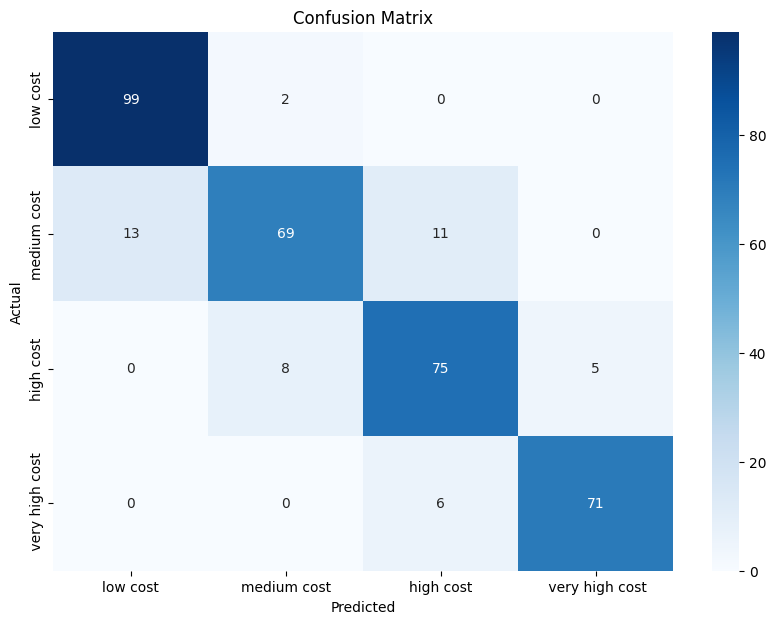

In [136]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['low cost', 'medium cost', 'high cost', ' very high cost'], 
                     columns = ['low cost', 'medium cost', 'high cost', ' very high cost'])

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


* The model achieved a perfect training accuracy of 1.0.
* On the test data, the model achieved an accuracy of approximately 0.88, demonstrating its ability to generalize effectively to new data.
* Precision, Recall, and F1-score:
* For Class 0, the model exhibited high precision (0.89) and recall (0.98), showcasing strong predictive performance.
* In Class 1, the recall (0.75) slightly trails behind precision (0.88), suggesting some missed true positives.
* Class 2 demonstrated balanced precision (0.82) and recall (0.85), indicating effective prediction.
* For Class 3, the model achieved high precision (0.93) and recall (0.92), reflecting robust predictive capability.
* Overfitting: The perfect training score and the slightly lower test score suggest potential overfitting of the model..

# Optimization

Since we have already done Grid search cross validation

a - Train with only selected features

# 1b Training using only selected features

(Realized later, categorical values are not added- to do)

In [157]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 15],       # Maximum depth of the trees
    'min_samples_split': [2, 4, 11],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 3, 5]      # Minimum number of samples required at each leaf node
}

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Fit the model on the training data
best_rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the training set
y_train_pred = best_rf_classifier.predict(X_train_selected)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Make predictions on the test set
y_test_pred = best_rf_classifier.predict(X_test_selected)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


KeyboardInterrupt: 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Assuming `df` is your original DataFrame
feature_names = X_train.columns

# Feature selection
selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train, y_train)

# Get the Boolean mask of the selected features
selected_features_mask = selector.get_support()

# Apply the mask to the feature names to get the names of the selected features
selected_feature_names = feature_names[selected_features_mask]

print(selected_feature_names)



Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')


In [138]:
# Get the number of trees
num_trees = best_rf_classifier.n_estimators
print(f'The number of trees in the model: {num_trees}')

The number of trees in the model: 300


In [139]:
estimator = best_rf_classifier.estimators_[5]  # Extract the 6th tree (index starts from 0)


In [142]:
X_train = pd.DataFrame(X_train)

# Access the columns attribute of the DataFrame
selected_features = X_train.columns[selector.get_support()]
selected_features


Index([0, 11, 12, 13], dtype='int64')

In [143]:


# Convert y_train to string type if necessary
class_names = [str(i) for i in np.unique(y_train)]

# Use class_names in the export_graphviz function
export_graphviz(estimator, out_file='tree.dot', feature_names=selected_features, class_names=class_names, rounded=True, precision=2, filled=True)

# Convert .dot file to .png
os.system('dot -Tpng tree.dot -o tree.png')




0

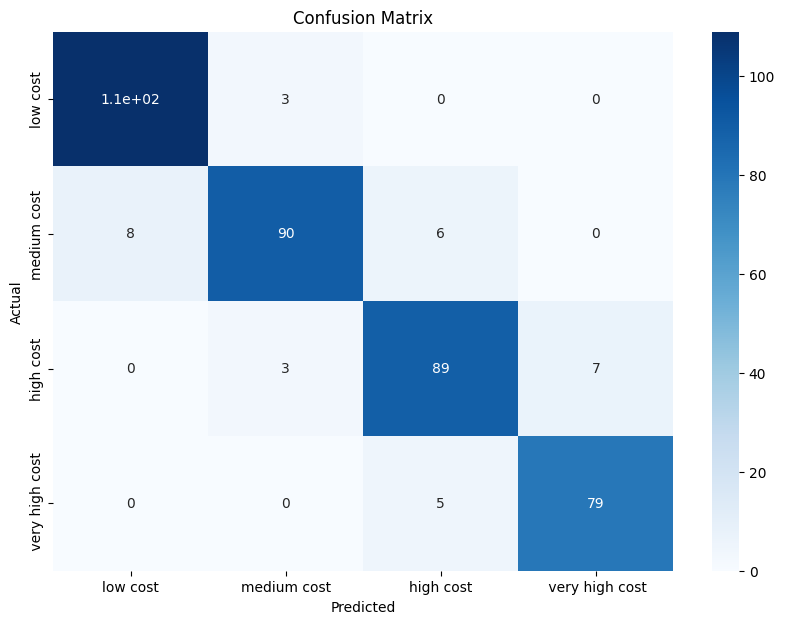

In [144]:

cm = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(cm, 
                     index = ['low cost', 'medium cost', 'high cost', ' very high cost'], 
                     columns = ['low cost', 'medium cost', 'high cost', ' very high cost'])

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# 2 Training SVM using the selected features

In [155]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
# Train the SVM classifier
svm_clf = SVC(kernel='linear')  
svm_clf.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test_selected)

# Calculate accuracy
train_accuracy = svm_clf.score(X_train_selected, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

# Print accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9561128526645768
Test Accuracy: 0.9699248120300752

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       112
           1       0.96      0.99      0.98       104
           2       0.97      0.93      0.95        99
           3       0.94      0.98      0.96        84

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



# Conclusion


* 1st model : Random calssifier with selected features
* 2nd model : SVM with the same selected features

Sure, here are some insights from the comparison of the two results:

1. **Training Accuracy**: The training accuracy for the first model is **1.0**, which indicates that it has perfectly learned the training data. However, the second model has a training accuracy of **0.956**, which is slightly lower.

2. **Testing Accuracy**: The testing accuracy for the first model is **0.92**, while for the second model it is higher at **0.97**. This suggests that the second model generalizes better to unseen data.

3. **Precision, Recall, and F1-score**: The second model outperforms the first model in terms of precision, recall, and F1-score for all classes (0, 1, 2, 3). This indicates that the second model is better at correctly classifying instances of each class, and it is more balanced in terms of false positives and false negatives.

In summary, while the first model performs perfectly on the training data, it seems to be overfitting as its performance drops on the test data. The second model, on the other hand, shows a better balance between learning the training data and generalizing to unseen data, resulting in superior performance on the test data. Therefore, the second model appears to be the better model of the two.




In [156]:
import pickle

# Save the model to a pickle file
with open('svm_classifier.pkl', 'wb') as file:
    pickle.dump(svm_clf, file)